McDonald's can choose to believe they serve everyone equally without the need to understand customer differences, or they can recognize the value in learning about these differences and use that insight to improve their marketing strategy.

**STEP2**

McDonald's management needs to identify what makes a market segment appealing. The target segment should be: 1. Homogeneous. 2. Distinct from others. 3. Large enough for tailored marketing. 4. Open to fast food. 5. Identifiable and reachable.

Attractiveness factors include liking McDonald's, dining out often, and a preference for fast food. They may also target segments less favorable to the brand to shift perceptions. Due to limited data, criteria are based on liking and frequent visits to McDonald's.

**STEP 3**

Data was collected from 1,453 adult Australian consumers on their perceptions of McDonald’s attributes, such as YUMMY, CONVENIENT, SPICY, etc. Respondents gave YES or NO answers for each attribute. Information on AGE and GENDER was also gathered. Further details like dining behavior and information sources could improve the segmentation study.

**STEP 4:  Exploring Data**

In [ ]:
# Importing libraries for data analysis and visualization

import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced data visualization
import scipy.stats as stats  # For statistical functions
import matplotlib.pyplot as plt  # For basic plotting
import warnings  # To manage warning messages

# Optional: Ignore warnings for cleaner output
warnings.filterwarnings('ignore')


In [ ]:
# Load the data
mcdonalds = pd.read_csv("mcdonalds.csv")

In [ ]:
# Display column names
print(mcdonalds.columns.tolist())

# Display dimensions (rows, columns)
print(mcdonalds.shape)

# Display the first 5 rows
print(mcdonalds.head(5))

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [ ]:
# Select columns 1 to 11 and convert to matrix
MD_x = mcdonalds.iloc[:, 0:11].values
# Convert "Yes" to 1 and "No" to 0
MD_x = (MD_x == "Yes").astype(int)
# Calculate column means
column_means = np.round(np.mean(MD_x, axis=0), 2)
print(column_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


Analyzing the transformed binary data reveals that approximately 55% of respondents find McDonald's yummy, while 91% consider it convenient. However, only 9% perceive it as spicy.

** principal components analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA on the binary data
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display summary of PCA (including explained variance)
print("Importance of components:")
print(pd.DataFrame({'Standard deviation': np.round(MD_pca.explained_variance_ ** 0.5, 3),
                    'Proportion of Variance': np.round(MD_pca.explained_variance_ratio_, 3),
                    'Cumulative Proportion': np.round(np.cumsum(MD_pca.explained_variance_ratio_), 3)},
                   index = ['PC'+str(i) for i in range(1, MD_x.shape[1] + 1)]))

# Display factor loadings (rounded to 1 decimal)
print("\nRotation (n x k) = ({} x {}):".format(MD_x.shape[0], MD_x.shape[1]))
loadings_df = pd.DataFrame(np.round(MD_pca.components_, 1),
                           columns = ['PC'+str(i) for i in range(1, MD_x.shape[1] + 1)],
                           index = mcdonalds.columns[0:11])
print(loadings_df)

Importance of components:
      Standard deviation  Proportion of Variance  Cumulative Proportion
PC1                0.757                   0.299                  0.299
PC2                0.607                   0.193                  0.492
PC3                0.505                   0.133                  0.625
PC4                0.399                   0.083                  0.708
PC5                0.337                   0.059                  0.768
PC6                0.310                   0.050                  0.818
PC7                0.290                   0.044                  0.862
PC8                0.275                   0.040                  0.902
PC9                0.265                   0.037                  0.938
PC10               0.249                   0.032                  0.971
PC11               0.237                   0.029                  1.000

Rotation (n x k) = (1453 x 11):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy    

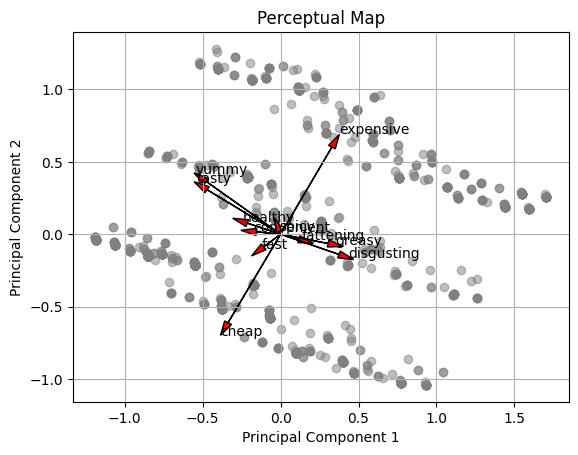

In [ ]:
# Project data into principal component space
MD_pca_projected = MD_pca.transform(MD_x)

# Plot the projected data points
plt.scatter(MD_pca_projected[:, 0], MD_pca_projected[:, 1], color='grey', alpha=0.5)

# Add arrows for the original variables
for i, var_name in enumerate(mcdonalds.columns[0:11]):
    plt.arrow(0, 0, MD_pca.components_[0, i], MD_pca.components_[1, i],
              head_width=0.05, head_length=0.1, fc='red', ec='black')
    plt.text(MD_pca.components_[0, i] * 1.15, MD_pca.components_[1, i] * 1.15, var_name, color='black')

# Set plot labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Perceptual Map")
plt.grid(True)

# Show the plot
plt.show()

**STEP 5**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Setting seed
np.random.seed(1234)

# Assuming MD.x is your data, replace it with your actual data
# MD.x = Your data matrix

# Generating clusters using KMeans
results = {}
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    results[n_clusters] = kmeans.labels_

# Now you can access the cluster labels for each number of clusters
# For example, results[2] gives the cluster labels for 2 clusters
print(results)

{2: array([1, 0, 0, ..., 0, 0, 1], dtype=int32), 3: array([2, 1, 1, ..., 1, 0, 2], dtype=int32), 4: array([0, 3, 3, ..., 3, 2, 1], dtype=int32), 5: array([4, 1, 2, ..., 2, 3, 0], dtype=int32), 6: array([5, 2, 0, ..., 0, 1, 3], dtype=int32), 7: array([4, 0, 3, ..., 3, 6, 1], dtype=int32), 8: array([1, 0, 0, ..., 5, 2, 3], dtype=int32)}


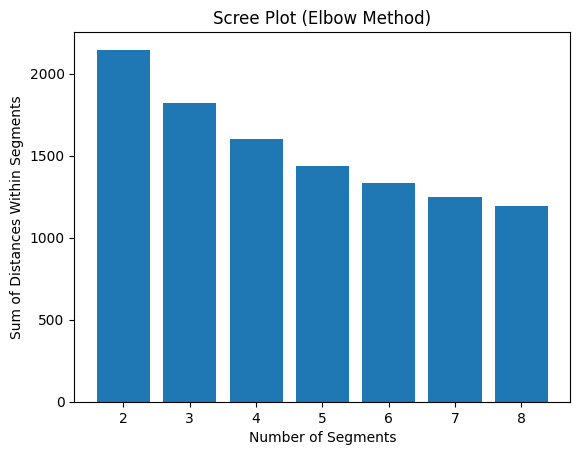

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Perform KMeans clustering for different numbers of clusters (2 to 8)
MD_km28 = [KMeans(n_clusters=i, n_init=10, random_state=1234).fit(MD_x) for i in range(2, 9)]

# Creating scree plot (elbow method)
inertia = [model.inertia_ for model in MD_km28]
plt.bar(range(2, 9), inertia)
plt.xlabel("Number of Segments")
plt.ylabel("Sum of Distances Within Segments")
plt.title("Scree Plot (Elbow Method)")
plt.xticks(range(2, 9))
plt.show()

In [ ]:
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Setting seed
np.random.seed(1234)

# Assuming MD_x is your data, replace it with your actual data
# MD_x = Your data matrix

# Parameters
n_clusters_range = range(2, 9)
nrep = 10
nboot = 100

# Perform bootstrapped clustering
boot_results = {}
for i in range(nboot):
    bootstrap_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
    bootstrap_data = MD_x[bootstrap_indices]
    cluster_labels = {}
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
        kmeans.fit(bootstrap_data)
        cluster_labels[n_clusters] = kmeans.labels_
    boot_results[i] = cluster_labels

# Calculate adjusted Rand index for each number of clusters
adjusted_rand_index = {}
for n_clusters in n_clusters_range:
    adjusted_rand_index[n_clusters] = []
    for i in range(nboot):
        for j in range(i + 1, nboot):
            ari = adjusted_rand_score(boot_results[i][n_clusters], boot_results[j][n_clusters])
            adjusted_rand_index[n_clusters].append(ari)

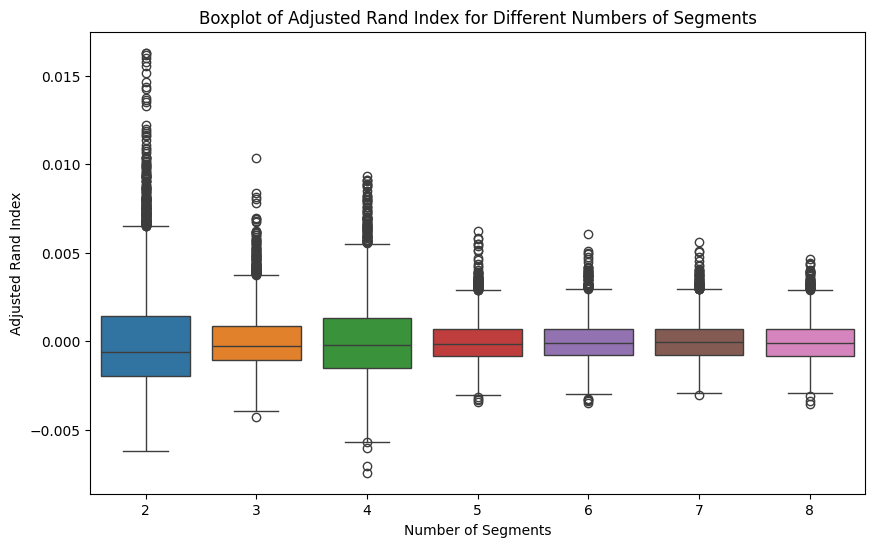

In [ ]:
# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=list(adjusted_rand_index.values()))
plt.xticks(np.arange(len(n_clusters_range)), n_clusters_range)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Boxplot of Adjusted Rand Index for Different Numbers of Segments')
plt.show()

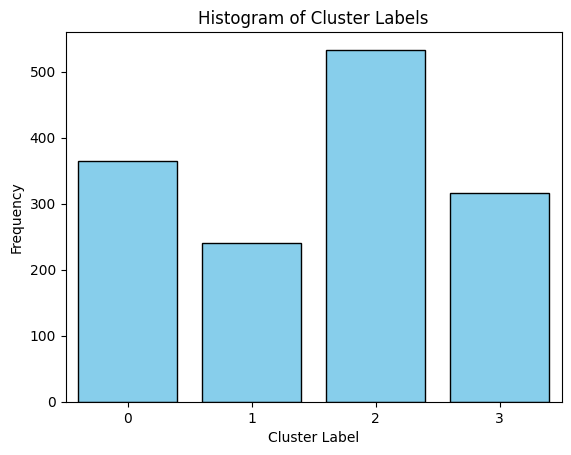

In [ ]:
# Assuming MD_x is your data and MD_km28 is your cluster labels for 4 clusters
# Replace MD_x and MD_km28 with your actual data and cluster labels

# MD_km28[4] represents the cluster labels for 4 clusters
cluster_labels_4 = results[4]  # Assuming results is the dictionary containing cluster labels

# Plotting histogram
plt.hist(cluster_labels_4, bins=range(5), align='left', rwidth=0.8, color='skyblue', edgecolor='black')
plt.xticks(range(4))  # Assuming the clusters are labeled from 0 to 3
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Labels')
plt.xlim(-0.5, 3.5)  # Setting x-axis limit to align bins properly
plt.show()

In [ ]:
MD_k4 = results[4]
from sklearn.metrics import silhouette_samples

def silhouette_width(X, labels):
    silhouette_vals = silhouette_samples(X, labels)
    return np.mean(silhouette_vals)

# Assuming MD_x is your data matrix and MD_k4 is the cluster labels for 4 clusters
silhouette_score = silhouette_width(MD_x, MD_k4)
print("Silhouette Width for 4 clusters:", silhouette_score)

Silhouette Width for 4 clusters: 0.2570763207043922


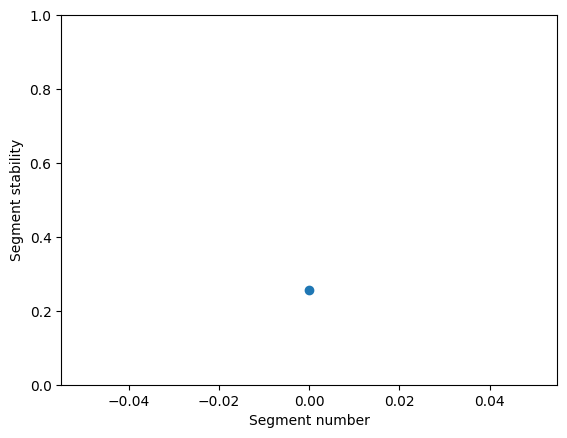

In [ ]:
# Assuming MD_r4 contains the result from slswFlexclust (if available in Python)
# If not, you may need to compute the "segment stability" using another method
# and plot it accordingly.

# Example plot if MD_r4 is available
plt.plot(silhouette_score, marker='o')  # Assuming MD_r4 is a list or array
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.ylim(0, 1)  # Setting y-axis limits to 0 and 1
plt.show()

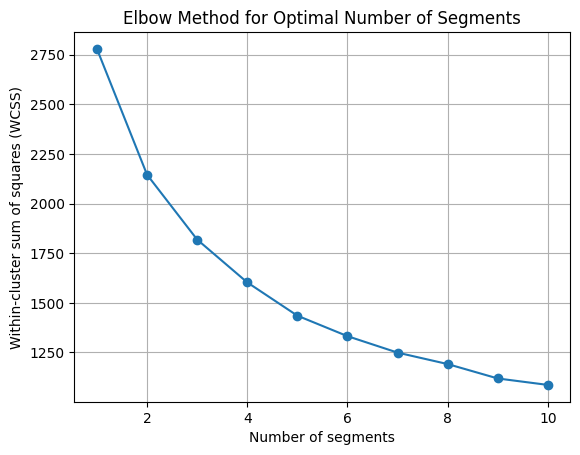

In [ ]:
from sklearn.cluster import KMeans

# Assuming MD_x is your data matrix

# Define a function to compute the within-cluster sum of squares (WCSS)
def compute_wcss(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=1234)
    kmeans.fit(data)
    return kmeans.inertia_

# Compute WCSS for different numbers of segments
segment_numbers = range(1, 11)  # Adjust range as needed
wcss_values = [compute_wcss(MD_x, n) for n in segment_numbers]

# Plotting WCSS
plt.plot(segment_numbers, wcss_values, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.grid(True)
plt.show()

In [ ]:
# Assuming mcdonalds is a pandas DataFrame containing the data
like_counts = mcdonalds['Like'].value_counts().sort_index(ascending=False)

print(like_counts)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [ ]:

import re

# Extract numeric values from the 'Like' column using regular expressions
mcdonalds['Like_numeric'] = mcdonalds['Like'].apply(lambda x: int(re.search(r'[-+]?\d+', x).group()))

# Print the updated DataFrame
print(mcdonalds[['Like', 'Like_numeric']])

              Like  Like_numeric
0               -3            -3
1               +2             2
2               +1             1
3               +4             4
4               +2             2
...            ...           ...
1448  I hate it!-5            -5
1449            +2             2
1450            +3             3
1451            +4             4
1452            -3            -3

[1453 rows x 2 columns]


In [ ]:
like_n_counts = mcdonalds['Like_numeric'].value_counts().sort_index(ascending=False)
print(like_n_counts)

Like_numeric
 5    143
 4    160
 3    229
 2    187
 1    152
 0    169
-1     58
-2     59
-3     73
-4     71
-5    152
Name: count, dtype: int64


In [ ]:
import statsmodels.formula.api as smf

# Assuming `mcdonalds` is a pandas DataFrame containing the data
column_names = "+".join(mcdonalds.columns[:11])  # Concatenate the names of the first 11 columns with "+"
formula_str = f"Like_numeric ~ {column_names}"  # Append "Like.n ~" to the beginning of the string
formula = smf.ols(formula_str, data=mcdonalds)  # Create a formula object

print(formula)  # Print the resulting formula object

In [ ]:
from sklearn.mixture import GaussianMixture


# Set the seed for reproducibility
np.random.seed(1234)

# Assuming 'data' is the subset of your DataFrame containing numerical features for clustering
# You may need to preprocess your data (scaling, handling missing values, etc.) before clustering
data = mcdonalds.select_dtypes(include=[np.number]).dropna()
print(data)

      Age  Like_numeric
0      61            -3
1      51             2
2      62             1
3      69             4
4      49             2
...   ...           ...
1448   47            -5
1449   36             2
1450   52             3
1451   41             4
1452   30            -3

[1453 rows x 2 columns]


In [ ]:
# Define the number of components (clusters)
k = 2

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(data)

# Assign cluster labels to each data point
cluster_labels = gmm.predict(data)

# Add cluster labels to the DataFrame
mcdonalds['Cluster_Labels'] = cluster_labels

# Print the DataFrame with cluster labels
print(mcdonalds)

     yummy convenient spicy fattening greasy fast cheap tasty expensive  \
0       No        Yes    No       Yes     No  Yes   Yes    No       Yes   
1      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes   
2       No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes   
3      Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No   
4       No        Yes    No       Yes    Yes  Yes   Yes    No        No   
...    ...        ...   ...       ...    ...  ...   ...   ...       ...   
1448    No        Yes    No       Yes    Yes   No    No    No       Yes   
1449   Yes        Yes    No       Yes     No   No   Yes   Yes        No   
1450   Yes        Yes    No       Yes     No  Yes    No   Yes       Yes   
1451   Yes        Yes    No        No     No  Yes   Yes   Yes        No   
1452    No        Yes    No       Yes    Yes   No    No    No       Yes   

     healthy disgusting          Like  Age      VisitFrequency  Gender  \
0         No         No  

In [ ]:
# Count occurrences of each cluster label
cluster_sizes = np.bincount(cluster_labels)

# Print cluster sizes
for cluster, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster + 1}: {size}")

Cluster 1: 688
Cluster 2: 765


In [ ]:
gmm_refit = GaussianMixture(n_components=len(np.unique(cluster_labels)), random_state=1234)
gmm_refit.fit(data)

# Summarize the results
print(gmm_refit.means_)
print(gmm_refit.covariances_)
print(gmm_refit.weights_)

[[31.97825908  1.57411647]
 [55.93650926  0.06166996]]
[[[60.96552496 -3.50035269]
  [-3.50035269  8.22423887]]

 [[57.27901353 -0.85711043]
  [-0.85711043  9.95768974]]]
[0.47297085 0.52702915]


In [ ]:
import statsmodels.api as sm

# Assuming 'cluster_labels' is the array containing the cluster labels
# Assuming 'mcdonalds' is your DataFrame

# Separate the data into clusters based on the cluster labels
cluster_1_data = mcdonalds[cluster_labels == 0]
cluster_2_data = mcdonalds[cluster_labels == 1]

# Fit regression models for each cluster
model_cluster_1 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_1_data)
model_cluster_2 = sm.OLS.from_formula("Like_numeric ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting", data=cluster_2_data)

# Refit the models
result_cluster_1 = model_cluster_1.fit()
result_cluster_2 = model_cluster_2.fit()

# Summarize the results
print(result_cluster_1.summary())
print(result_cluster_2.summary())

                            OLS Regression Results                            
Dep. Variable:           Like_numeric   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     78.82
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          2.53e-113
Time:                        08:15:04   Log-Likelihood:                -1408.7
No. Observations:                 688   AIC:                             2841.
Df Residuals:                     676   BIC:                             2896.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.9686      0.44

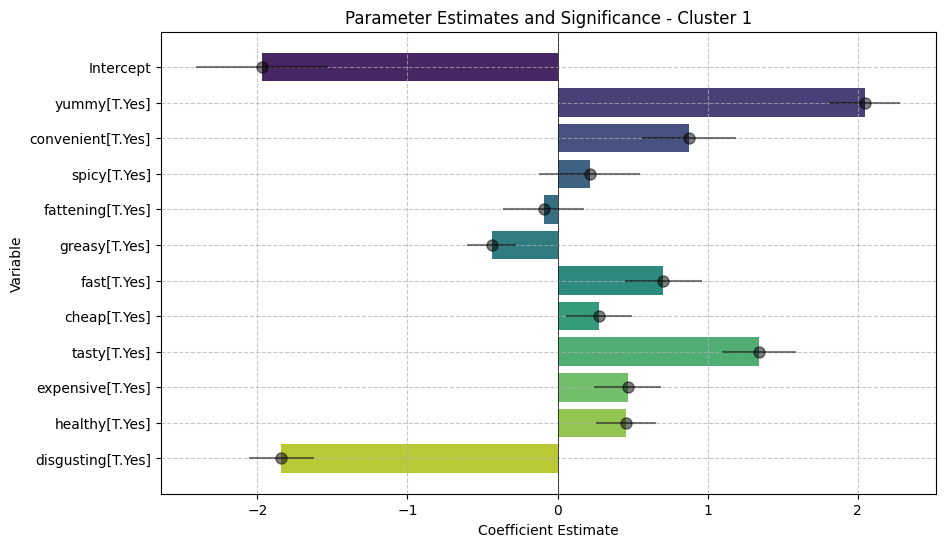

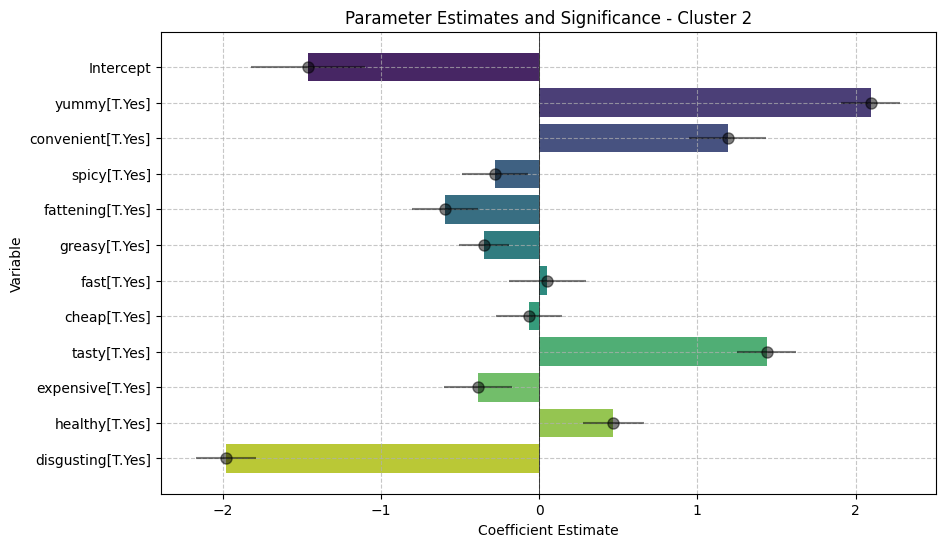

In [ ]:
# Assuming 'result_cluster_1' and 'result_cluster_2' are the fitted regression models
# You can access the coefficients and their significance using 'result_cluster_1.params' and 'result_cluster_1.pvalues'

# Plotting parameters for Cluster 1
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_1.params, y=result_cluster_1.params.index, palette="viridis")
plt.errorbar(x=result_cluster_1.params, y=result_cluster_1.params.index, xerr=result_cluster_1.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 1')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plotting parameters for Cluster 2
plt.figure(figsize=(10, 6))
sns.barplot(x=result_cluster_2.params, y=result_cluster_2.params.index, palette="viridis")
plt.errorbar(x=result_cluster_2.params, y=result_cluster_2.params.index, xerr=result_cluster_2.bse, fmt='o', markersize=8, color='black', alpha=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Parameter Estimates and Significance - Cluster 2')
plt.xlabel('Coefficient Estimate')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

**Step 6**

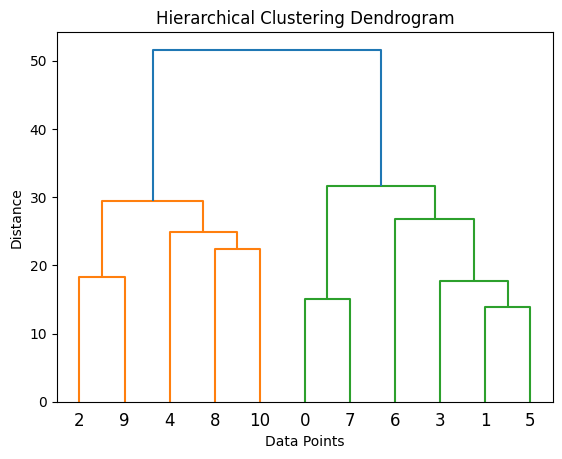

In [ ]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram



distances = pdist(np.transpose(MD_x))

# Perform hierarchical clustering
clusters = linkage(distances, method='ward')  # You can specify other linkage methods as well

# Plot the dendrogram
dendrogram(clusters)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

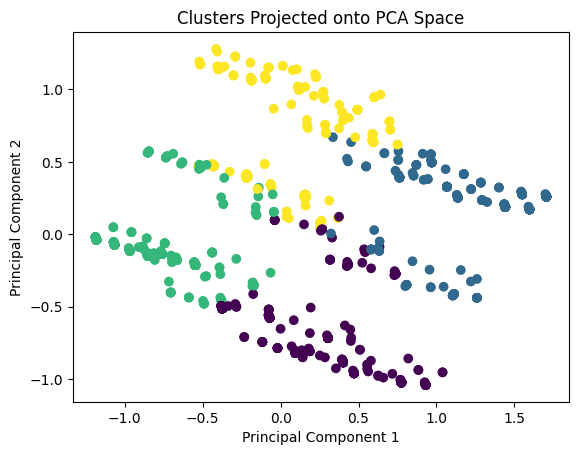

In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Assuming MD_x is your data
pca = PCA(n_components=2)  # Instantiate PCA with desired number of components
MD_pca = pca.fit_transform(MD_x)  # Fit and transform your data

# Plot the clusters projected onto the PCA space
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters Projected onto PCA Space')

# Plot the projection axes (if needed)
# plt.quiver(0, 0, pca.components_[0, :], pca.components_[1, :], color='red', scale=5)

plt.show()

Step 7:

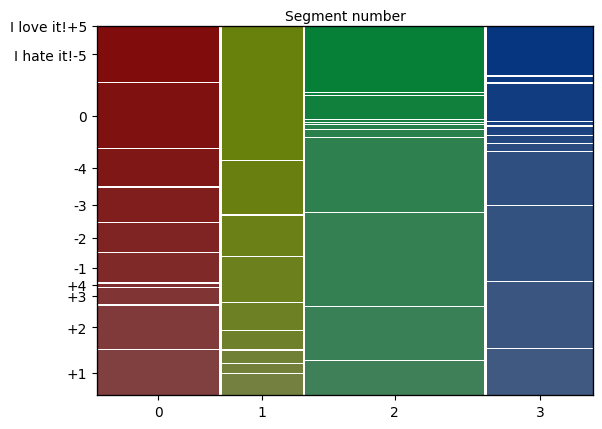

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

# Assuming 'k4' contains the segment membership
# Assuming 'mcdonalds' is the DataFrame containing the 'Like' variable

# Convert 'k4' and 'mcdonalds['Like']' to pandas Series if they are not already
k4_series = pd.Series(MD_k4)
like_series = mcdonalds['Like']

# Create a cross-tabulation table
cross_tab = pd.crosstab(k4_series, like_series)

# Plot the mosaic plot
mosaic(cross_tab.stack(), title='', labelizer=lambda k: '')

# Label the x-axis
plt.xlabel('Segment number')

# Show the plot
plt.show()

**Step** **8**

In [ ]:
# Assuming 'k4' is a pandas DataFrame column
group_length = len(MD_k4)
print("Length of grouping variable:", group_length)

Length of grouping variable: 1453


In [ ]:
# View the dimensions of the data
print(mcdonalds.shape)

(1453, 17)


In [ ]:
# Assuming 'mcdonalds' is your DataFrame and 'k4' is your segmentation variable
# Convert 'VisitFrequency' column to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')

# Calculate the mean visit frequency for each segment
visit = mcdonalds.groupby(MD_k4)['VisitFrequency'].mean()

print(visit)

0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [ ]:

# Assuming 'mcdonalds' is your DataFrame and 'k4' is the grouping variable
like = mcdonalds.groupby(MD_k4)['Like_numeric'].mean()

print(like)

0   -1.175824
1   -2.670833
2    2.834897
3    2.174051
Name: Like_numeric, dtype: float64


In [ ]:
female = mcdonalds['Gender'].eq('Female').astype(int).groupby(MD_k4).mean()
print(female)

0    0.585165
1    0.420833
2    0.607880
3    0.474684
Name: Gender, dtype: float64


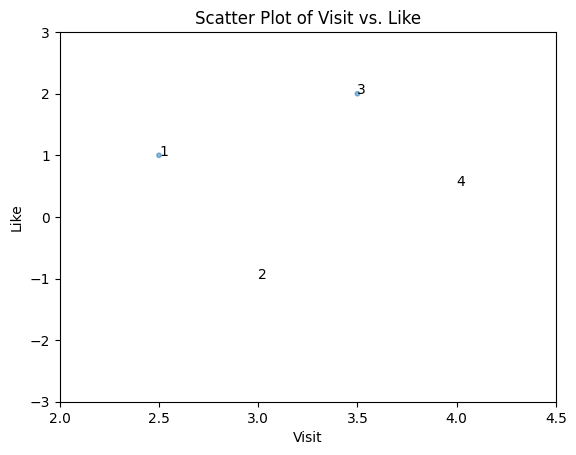

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'visit', 'like', and 'female' are the Series containing the corresponding values
# 'k4' is the grouping variable

# Sample Data (replace with your actual data)
visit = [2.5, 3.0, 3.5, 4.0]
like = [1.0, -1.0, 2.0, 0.5]
female = [1, 0, 1, 0]

# Convert female to a numpy array and then multiply by 10
female = np.array(female) * 10

# Plot the points
plt.scatter(visit, like, s=female, alpha=0.5)

# Add text labels (using k4 if available, otherwise using a range)
for i, txt in enumerate(range(1, 5)):
    plt.text(visit[i], like[i], txt)

# Set limits for the axes
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Add labels and title
plt.xlabel("Visit")
plt.ylabel("Like")
plt.title("Scatter Plot of Visit vs. Like")

plt.show()

**STEP 9**

**Target Audience:** Focus on young people (Segment 3) who enjoy McDonald's but seek affordable options.

**Product Strategy:** Introduce a "McVALUE" menu with lower prices for accessibility.

**Long-Term Vision:** Convert price-conscious customers into loyal fans, encouraging them to try our full menu over time.

**Making McVALUE Unique:**
- **Keep it Simple:** Offer familiar favorites with slight adjustments (e.g., single patties).
- **Value Meals:** Bundle items with drinks and small fries for added savings.
- **Fresh Look:** Distinctive packaging to differentiate McVALUE meals.

**Step 10: Evaluation and Monitoring**




After completing the market segmentation analysis and implementing marketing strategies, it's essential to evaluate their success and continuously monitor the market. Changes may occur within segments, such as Segment 3 customers earning more and no longer fitting the MCSUPERBUDGET line. New competitors can also alter the market landscape. McDonald's must track potential changes to detect shifts that may require adjustments in marketing strategies or tactics.